In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
d = pd.read_csv('googleplaystore.csv')


#Преобразуем данные в колонке Install в числовые
d['Installs'].apply(lambda x : x.rstrip('+').replace(',','')).sort_values()

9719             0
9337             0
8081             0
5945             0
8614             0
           ...    
3796     500000000
1885     500000000
1661     500000000
1729     500000000
10472         Free
Name: Installs, Length: 10841, dtype: object

In [4]:
d.iloc[10472] # судя по всему ошибка в данных

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Похоже на некорректные данные, удаляем строку

In [6]:
d.drop(10472, inplace = True)

In [7]:
d['Installs'] = d['Installs'].apply(lambda x : int(x.strip('+').replace(',','')))
d['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [8]:
# Тоже самое делаем с ценой
d['Price'] = d['Price'].apply(lambda x : float(x.strip('$')))
d['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [9]:
# Создадим таблицу с основными аттрибутами
frame = d[['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type' , 'Price' , 'Genres']]

In [11]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       10840 non-null  object 
 1   Category  10840 non-null  object 
 2   Rating    9366 non-null   float64
 3   Reviews   10840 non-null  object 
 4   Installs  10840 non-null  int64  
 5   Type      10839 non-null  object 
 6   Price     10840 non-null  float64
 7   Genres    10840 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 762.2+ KB


In [12]:
frame.describe()

,Rating,Installs,Price
count,9366.000000,1.084000e+04,10840.000000
mean,4.191757,1.546434e+07,1.027368
std,0.515219,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.000000,1.000000e+03,0.000000
50%,4.300000,1.000000e+05,0.000000
75%,4.500000,5.000000e+06,0.000000
max,5.000000,1.000000e+09,400.000000


In [129]:
frame.mode().head(1)

,App,Category,Rating,Reviews,Installs,Type,Price,Genres
0,ROBLOX,FAMILY,4.4,0,1000000,Free,0.0,Tools


In [38]:
frame

,App,Category,Rating,Reviews,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0.0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0.0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0.0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,Free,0.0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,Free,0.0,Art & Design;Creativity
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,5000,Free,0.0,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100,Free,0.0,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,1000,Free,0.0,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1000,Free,0.0,Books & Reference


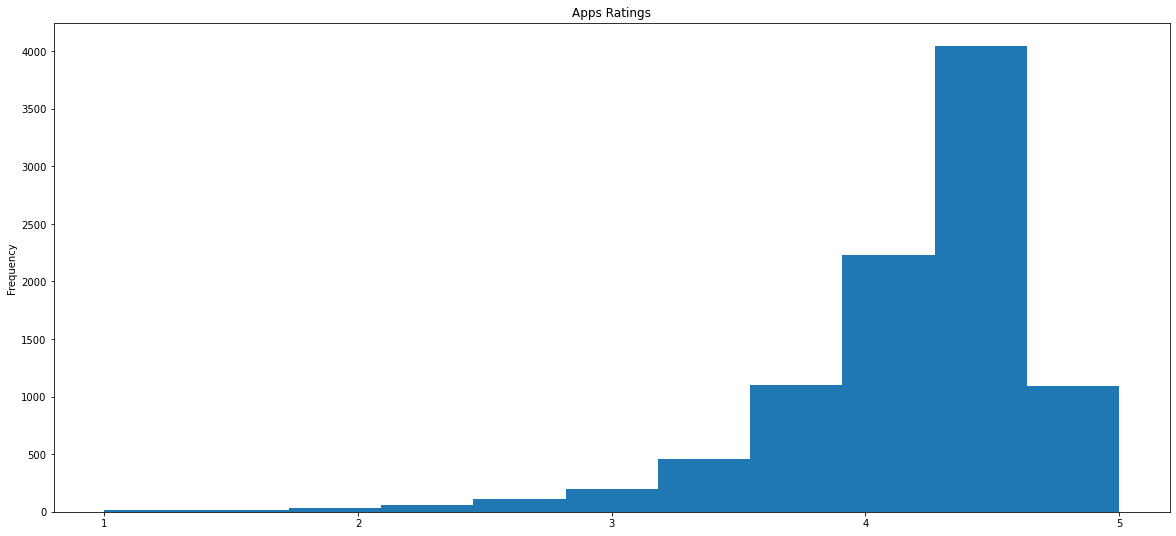

In [36]:
# Построим гистограмму и посмотрим распределение рейтинга
frame.Rating.plot(kind='hist', 
                   bins=11,
                   title='Apps Ratings',
                   xlabel='Rating',
                   ylabel='Apps',
                   xticks=range(1, 6),
                   figsize=(20,9))


Если увеличим разбивку bins, то становится видно лучше моду

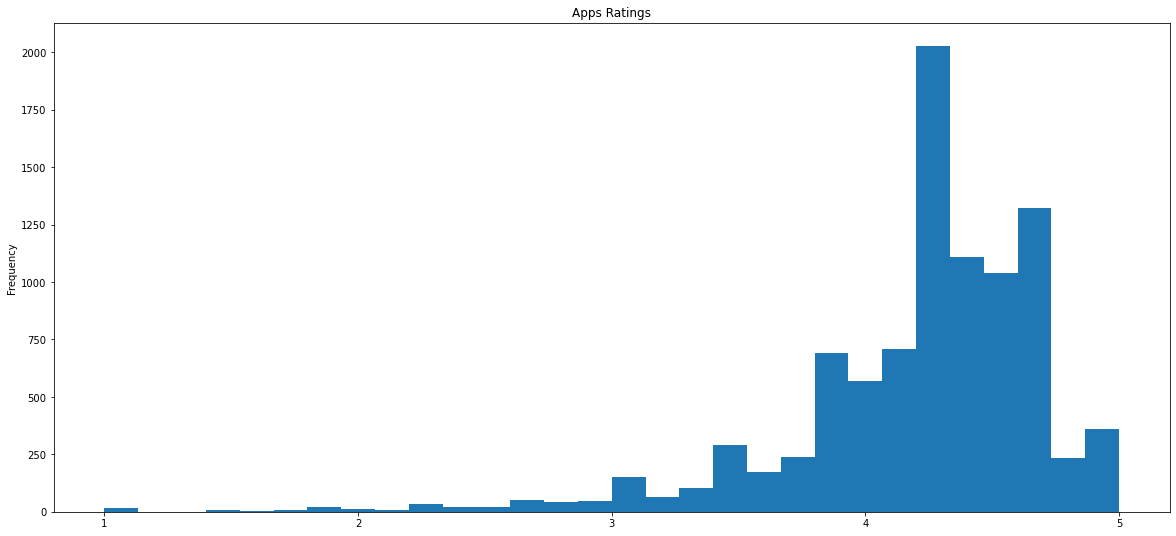

In [37]:
frame.Rating.plot(kind='hist', 
                   bins=30,
                   title='Apps Ratings',
                   xlabel='Rating',
                   ylabel='Apps',
                   xticks=range(1, 6),
                   figsize=(20,9))


Посмотрим на соотношение платных и бесплатных игр

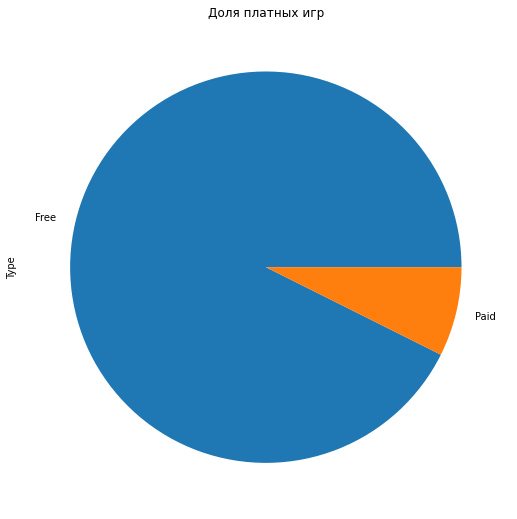

In [47]:
free_paym = frame.Type.value_counts()
pie = free_paym.plot(kind='pie',
                     title = 'Доля платных игр',
                     figsize=(9,9))

Как видно, практически все игры бесплатны, ну или точнее условно-бесплатны. Т.к. почти во всех играх есть внутриигровые платежи)

Наиболее скачиваемые категории приложений

In [150]:
genres = frame[['Category','Installs']].groupby('Category').sum()
top_10_categories = genres.sort_values('Installs').head(10)
top_10_categories

,Installs
Category,
EVENTS,15973161
BEAUTY,27197050
PARENTING,31521110
AUTO_AND_VEHICLES,53130211
MEDICAL,53257437
COMICS,56086150
LIBRARIES_AND_DEMO,62995910
ART_AND_DESIGN,124338100
HOUSE_AND_HOME,168712461


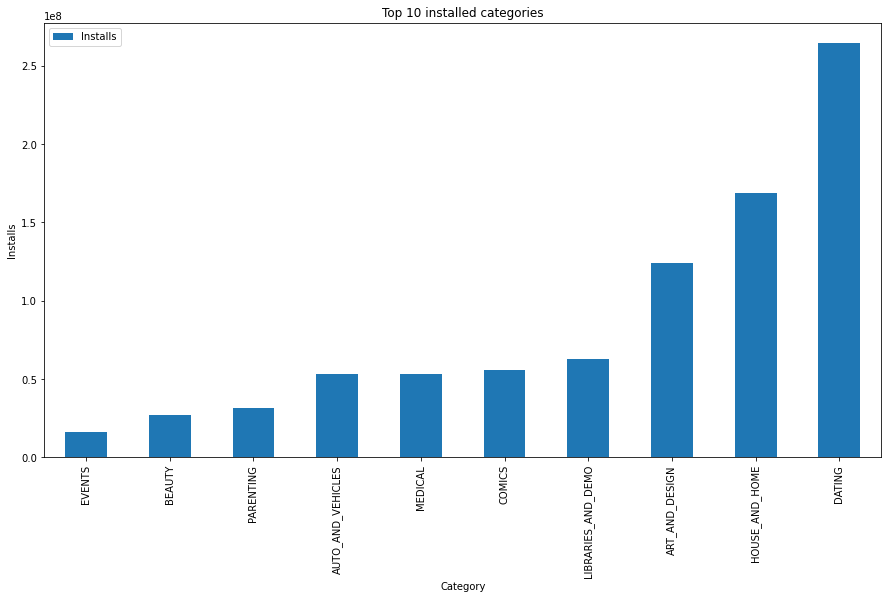

In [87]:

top_10_categories.plot(kind='bar',
                       title='Top 10 installed categories',
                       xlabel='Category',
                       ylabel='Installs',
                       figsize=(15,8))

Как видно из диаграммы, игры не вошли в топ-10 категорий! Лидируют приложения для знакомств

Посмотрим наибольшее количество скачиваний в разрезе категорий и оценок

In [160]:
rating_categories  = frame[(frame.Category.isin(top_10_categories.reset_index().Category)) & (frame.Rating > 2.8)].pivot_table (
    index='Rating',
    columns = 'Category',
    values='Installs',
    aggfunc=sum).fillna(0)

rating_categories

Category,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,COMICS,DATING,EVENTS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,MEDICAL,PARENTING
Rating,,,,,,,,,,
2.9,0.0,0.0,0.0,0.0,10000.0,500.0,0.0,0.0,10000.0,0.0
3.0,0.0,100.0,0.0,1000000.0,300600.0,0.0,0.0,0.0,306000.0,0.0
3.1,0.0,1000.0,10000.0,0.0,5000000.0,0.0,0.0,100000.0,65000.0,10000.0
3.2,5000.0,101000.0,0.0,5200000.0,0.0,0.0,0.0,500000.0,5000.0,0.0
3.3,0.0,0.0,0.0,510000.0,810000.0,0.0,0.0,0.0,0.0,0.0
3.4,100000.0,0.0,0.0,10000.0,750500.0,0.0,1200000.0,50000.0,214000.0,0.0
3.5,0.0,5100.0,0.0,110000.0,3762100.0,0.0,0.0,10000000.0,707000.0,10000.0
3.6,0.0,500000.0,0.0,0.0,1512000.0,0.0,500000.0,1000.0,133000.0,0.0
3.7,0.0,2000000.0,1000000.0,1050000.0,10170000.0,50000.0,700000.0,1010000.0,2158600.0,2000000.0


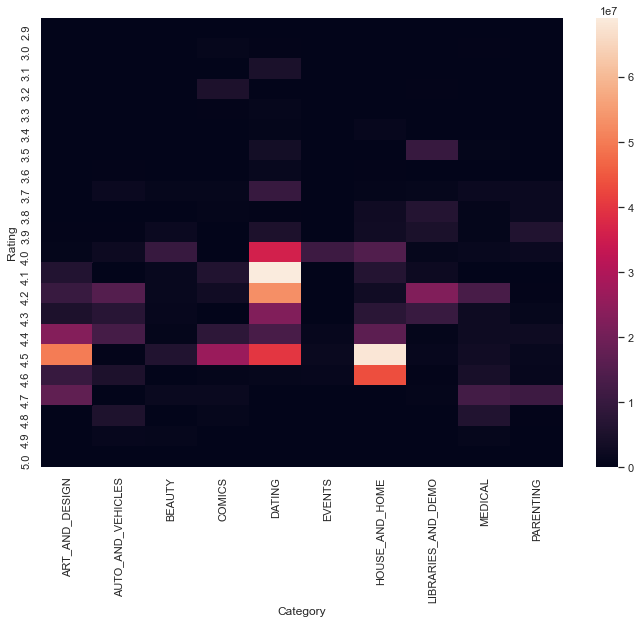

In [163]:
sns.heatmap(rating_categories)
sns.set(rc={'figure.figsize':(20,20)})

Посмотрим на выбросы в оценках

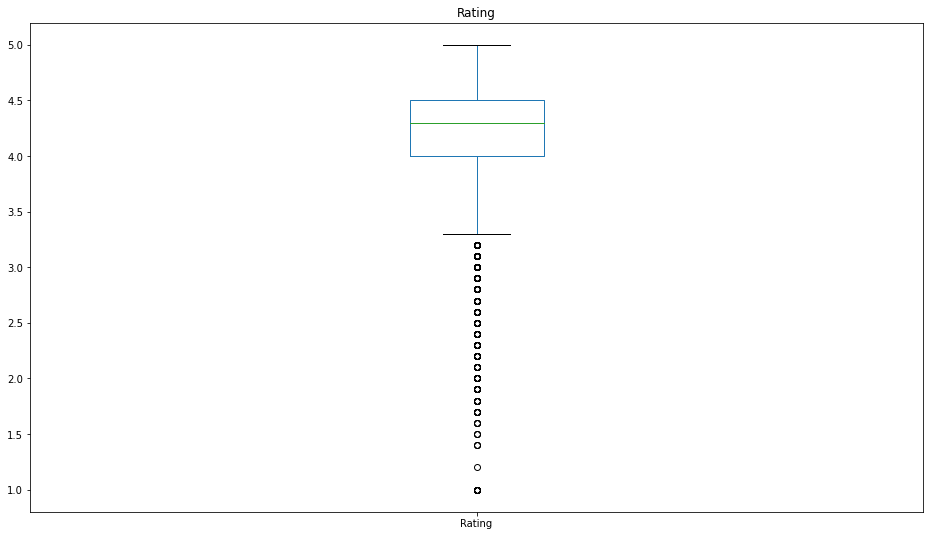

In [90]:
frame.Rating.plot(kind='box',
                   title='Rating',
                   figsize=(16,9))

Достаточно много выбросов. В принципе ничего удивительного нет, т.к. большая часть приложений бесплатные, то и качество некоторых приложений далеко не лучшее

Посмотрим на рейтинг категории игры

In [122]:

games = frame[(frame.Category == 'GAME')].drop_duplicates(subset='App').sort_values('Rating', ascending=False)
games

,App,Category,Rating,Reviews,Installs,Type,Price,Genres
5822,Flippy Axe : Flip The Knife & Axe Simulator,GAME,5.0,7,100,Free,0.00,Arcade
7466,211:CK,GAME,5.0,8,10,Paid,0.99,Arcade
5795,Axe Champs! Wars,GAME,5.0,8,50,Free,0.00,Arcade
6700,Brick Breaker BR,GAME,5.0,7,5,Free,0.00,Arcade
10776,Monster Ride Pro,GAME,5.0,1,10,Free,0.00,Racing
...,...,...,...,...,...,...,...,...
9884,Invasion: Defend EU,GAME,NaN,7,50,Free,0.00,Arcade
9898,Countries of the European Union (Quiz),GAME,NaN,11,100,Free,0.00,Trivia
10002,"Ew, the small alien",GAME,NaN,5,10,Free,0.00,Adventure
10367,FG SPINNER,GAME,NaN,2,10,Free,0.00,Board


Видим нормальное распределение оценок по категории игры. График похож на график оценок по всем приложениям.

Text(0.5, 1.0, 'Rating')

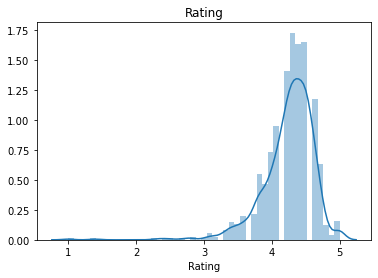

In [125]:
plot = sns.distplot(games.Rating)
plot.set_title('Rating')


In [177]:
games

,App,Category,Rating,Reviews,Installs,Type,Price,Genres
5822,Flippy Axe : Flip The Knife & Axe Simulator,GAME,5.0,7,100,Free,0.00,Arcade
7466,211:CK,GAME,5.0,8,10,Paid,0.99,Arcade
5795,Axe Champs! Wars,GAME,5.0,8,50,Free,0.00,Arcade
6700,Brick Breaker BR,GAME,5.0,7,5,Free,0.00,Arcade
10776,Monster Ride Pro,GAME,5.0,1,10,Free,0.00,Racing
...,...,...,...,...,...,...,...,...
9884,Invasion: Defend EU,GAME,NaN,7,50,Free,0.00,Arcade
9898,Countries of the European Union (Quiz),GAME,NaN,11,100,Free,0.00,Trivia
10002,"Ew, the small alien",GAME,NaN,5,10,Free,0.00,Adventure
10367,FG SPINNER,GAME,NaN,2,10,Free,0.00,Board


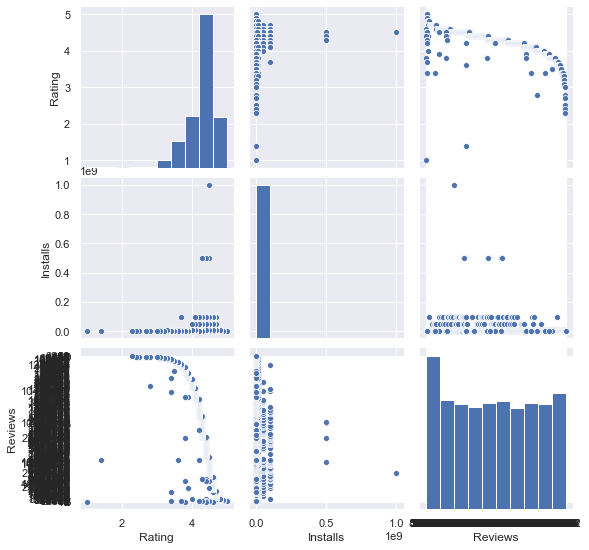

In [176]:
sns.pairplot(games[['Rating', 'Installs', 'Reviews']])

Хочется отметить , что по скачиваниям данные предоставлены достаточно ступенчато, т.к. нет промужутков между 10кк и 50кк. Поэтому у нас получается такие одинокие столбцы. Еще интересной особенностью можно отметить, что чем ниже оценка тем больше отзывов(rating - Reviews) оставляют, это подтверждает давнюю теорию, заключающуюся в том что отзывы оставляют в основном те кто чем либо недоволен :) 